In [9]:
from pathlib import Path
import os
import sys
from scipy.ndimage import gaussian_filter, median_filter
import matplotlib.pyplot as plt

currentdir = Path.cwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 
sys.path.insert(1, os.path.join(parentdir, 'data_utils')) 
#sys.path.insert(1, os.path.join(parentdir, 'configuration')) 
print(sys.path)

from hypercube_data import Cube_Read
from smoothing import MedianFilter, GaussianFilter

['/home/sc.uni-leipzig.de/mi186veva/hsi-experiments', '/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/data_utils', '/home/sc.uni-leipzig.de/mi186veva/hsi-experiments', '/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/data_utils', '/home/sc.uni-leipzig.de/mi186veva/hsi-experiments', '/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/data_utils', '/home/sc.uni-leipzig.de/mi186veva/hsi-experiments', '/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/data_utils', '/home/sc.uni-leipzig.de/mi186veva/hsi-experiments/jupyter', '/software/jupyter/conda/envs/jupyter/lib/python311.zip', '/software/jupyter/conda/envs/jupyter/lib/python3.11', '/software/jupyter/conda/envs/jupyter/lib/python3.11/lib-dynload', '', '/home/sc.uni-leipzig.de/mi186veva/.local/lib/python3.11/site-packages', '/software/jupyter/conda/envs/jupyter/lib/python3.11/site-packages']


In [8]:
spectrum, _ = Cube_Read('/work/mi186veva-MySpace/data_dat/2020_02_12_14_09_21_SpecCube.dat', 
                    wavearea=100, 
                    Firstnm=8, 
                    Lastnm=100).cube_matrix()
spectrum.shape

(480, 640, 92)

In [12]:
def plot_difference(spectrum, spectrum_smoothed):
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200)
    ax1.imshow(spectrum[..., 0])
    ax2.imshow(spectrum_smoothed[..., 0])
    plt.show()
    
    plt.plot(spectrum[0, 0])
    plt.plot(spectrum_smoothed[0, 0])
    plt.show()

Size 3


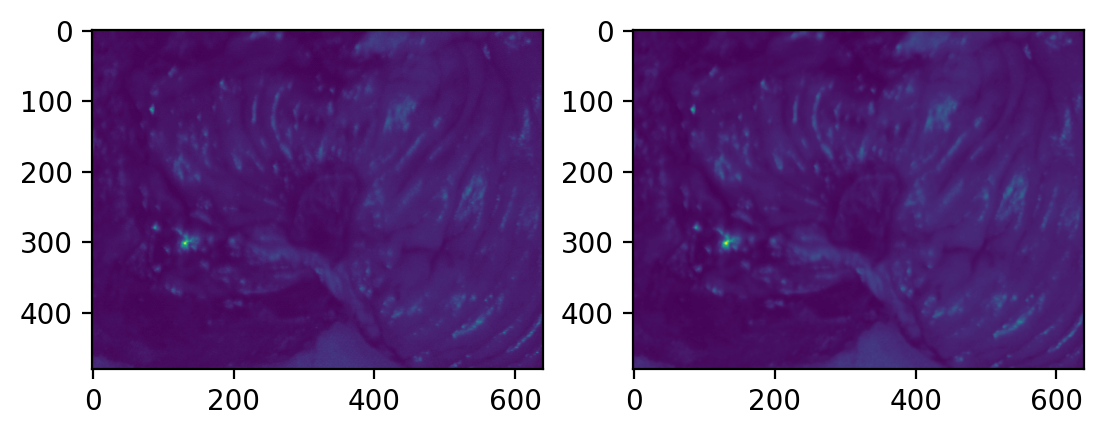

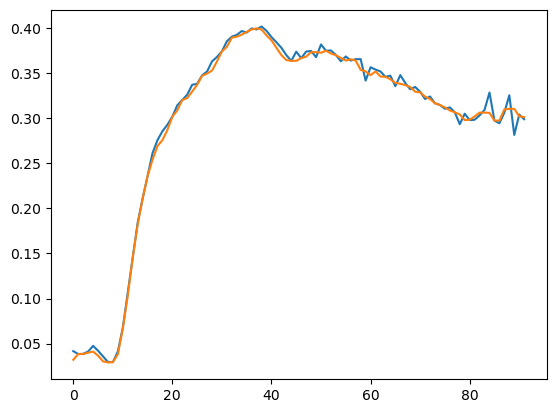

Size 5


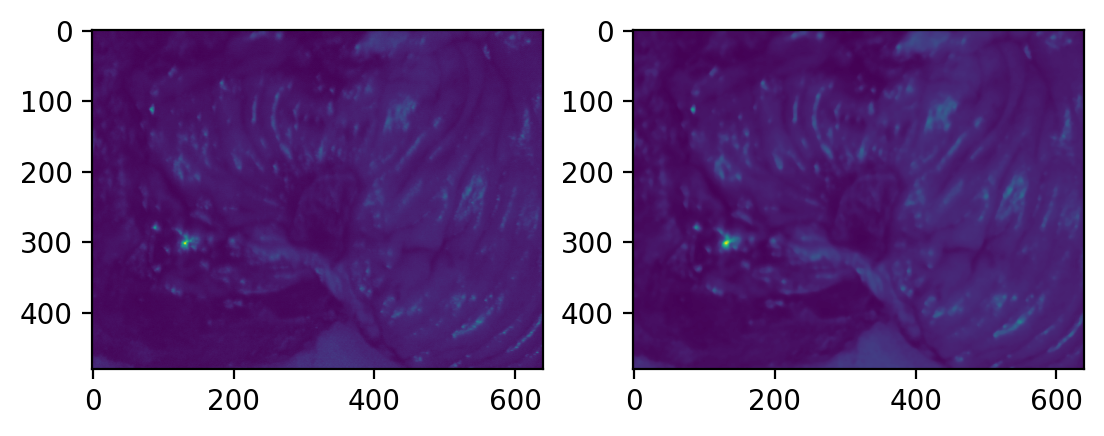

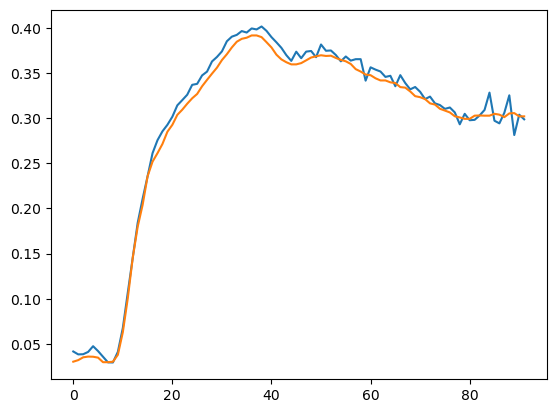

Size 7


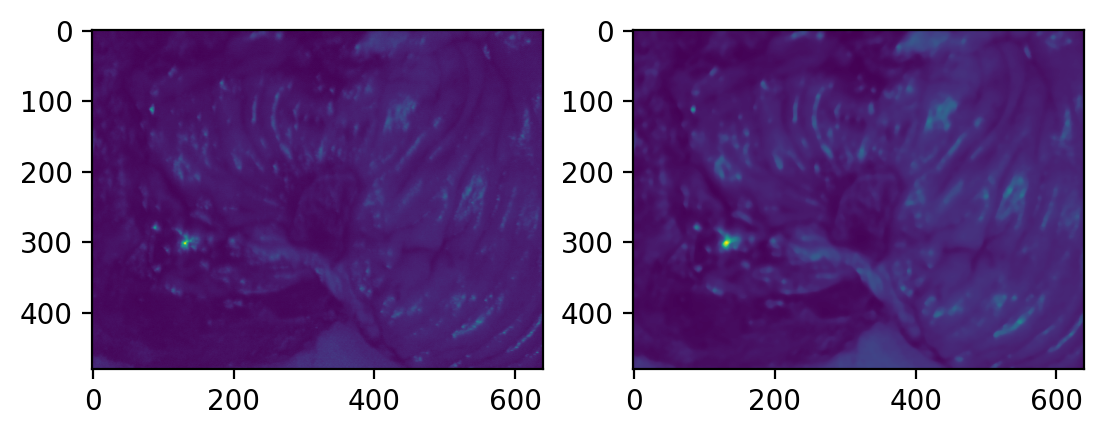

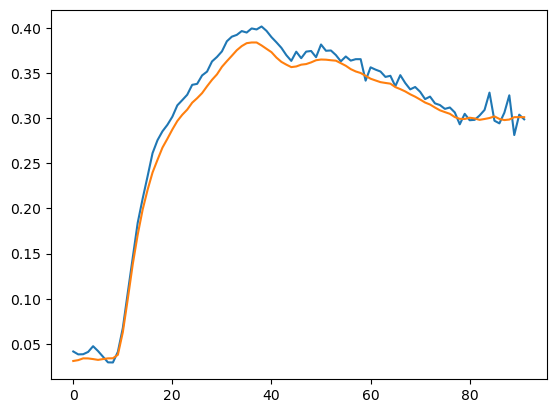

Size 11


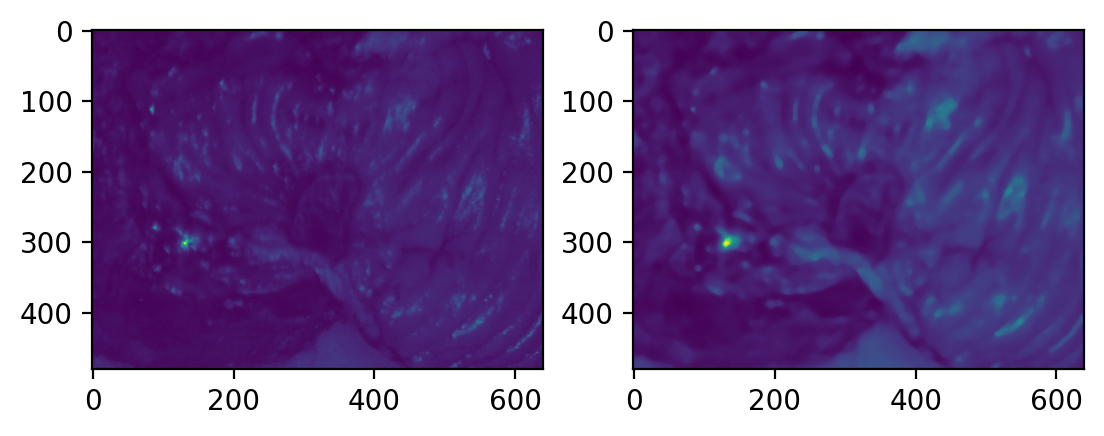

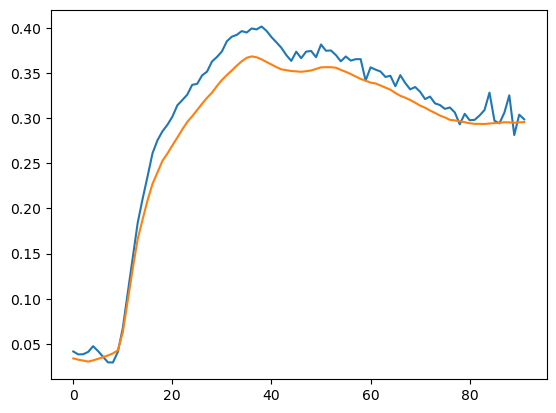

In [11]:
# check Median filter sizes
# conclusions [3-7] is okay, 7 is borline, spectrum seems too smooth, but doable
# the bigger window the longer processing time, 11 is very long

for size in [3, 5, 7, 11]:
    print(f'Size {size}')
    spectrum_smoothed = median_filter(spectrum, size=size)
    
    plot_difference(spectrum, spectrum_smoothed)
    

Size 0.1


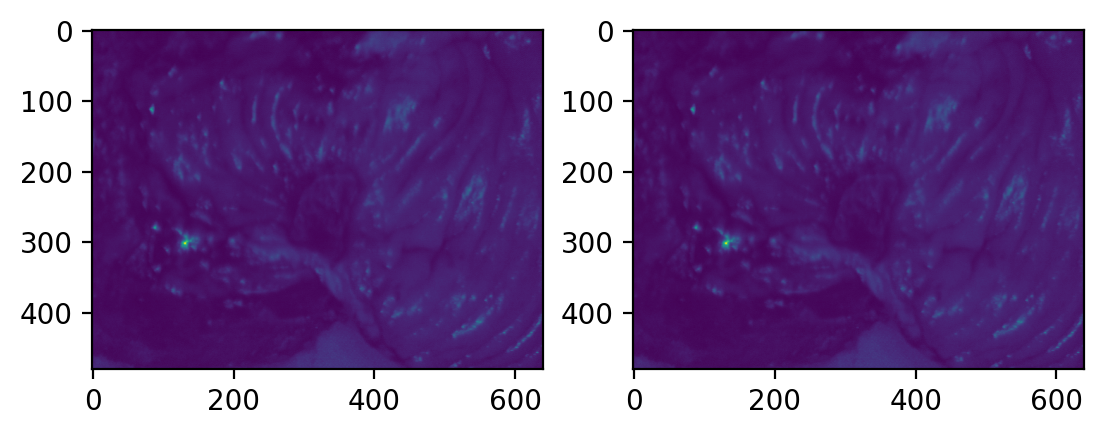

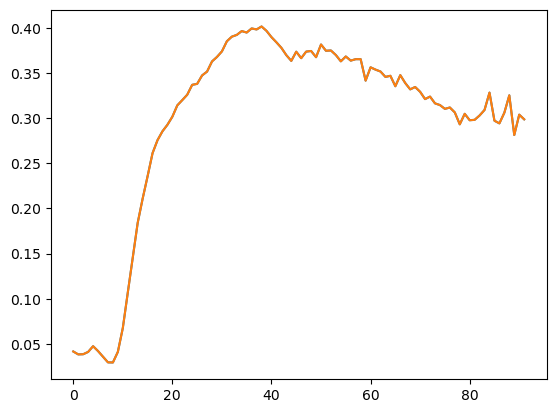

Size 0.5


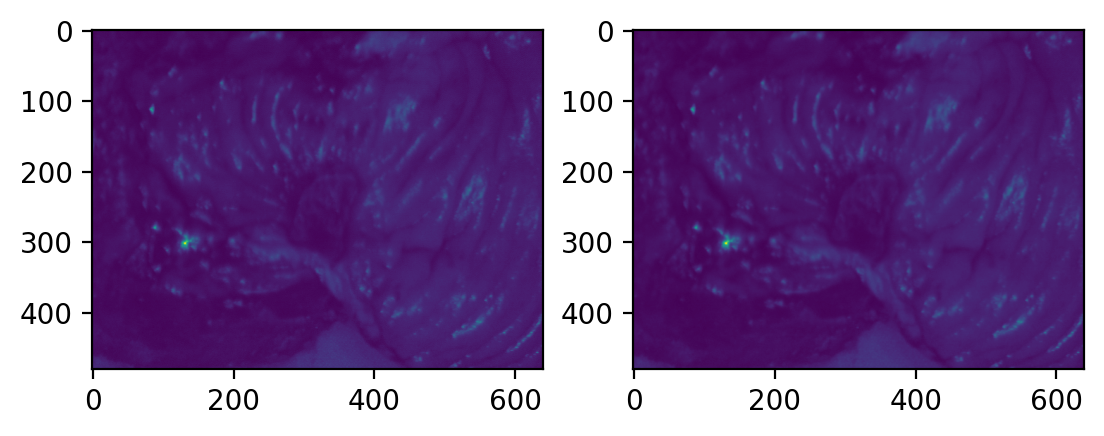

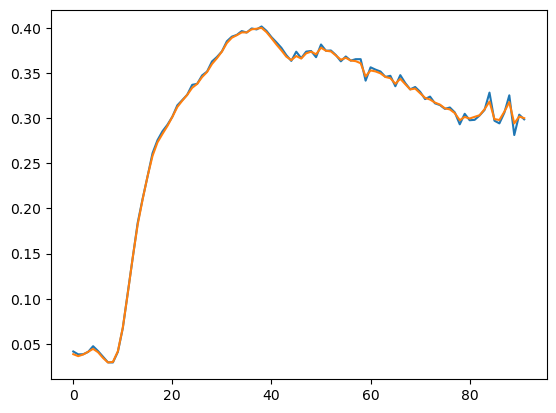

Size 1


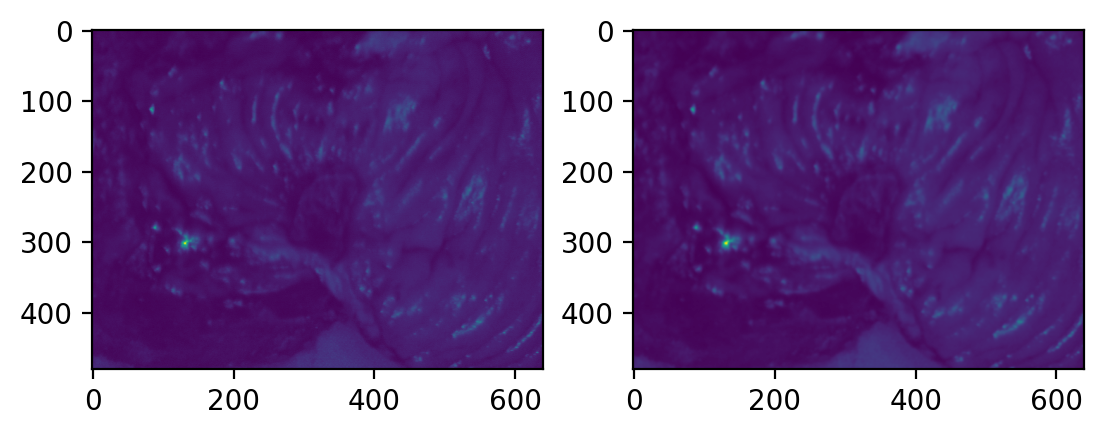

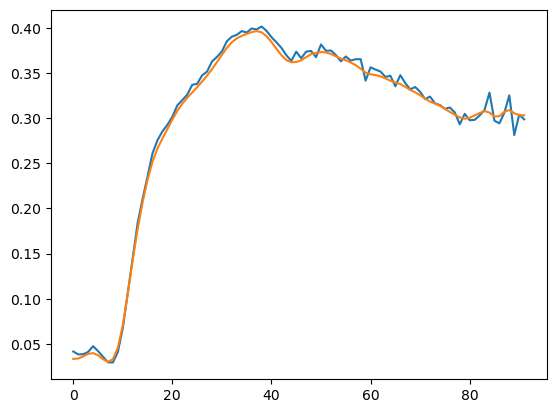

Size 1.5


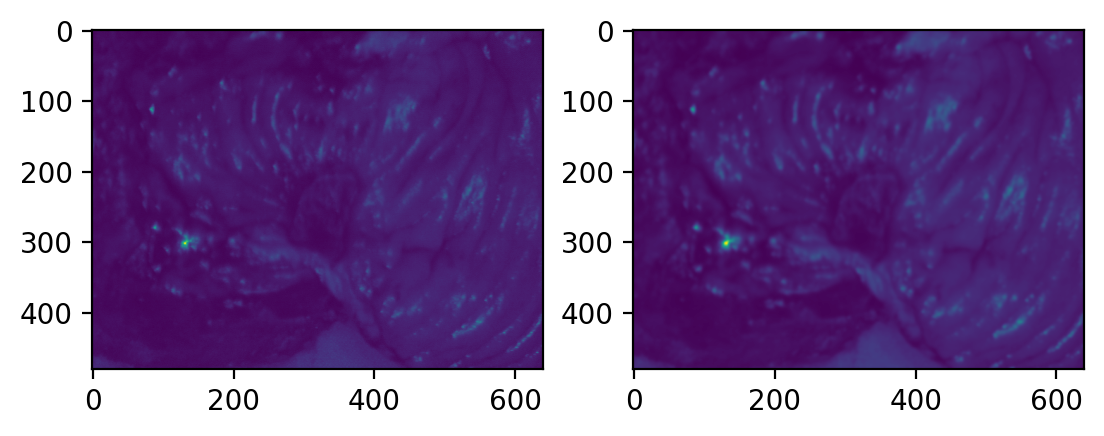

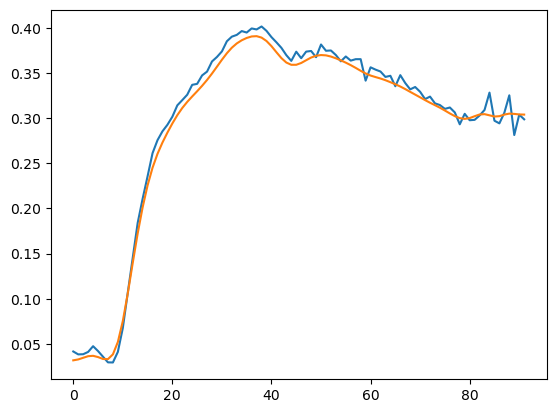

Size 2


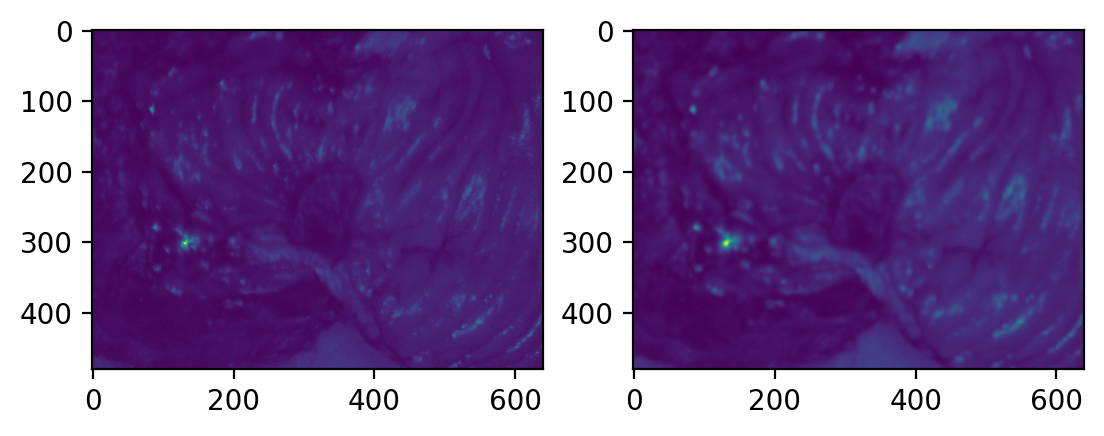

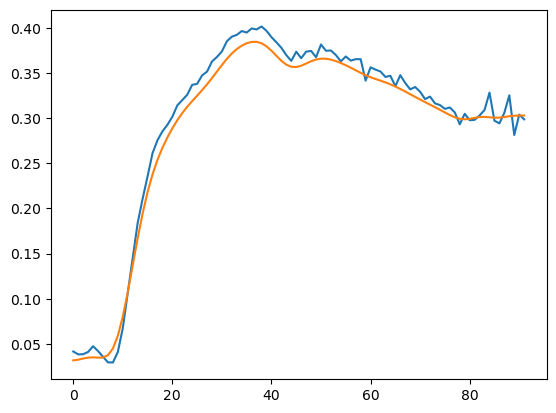

Size 3


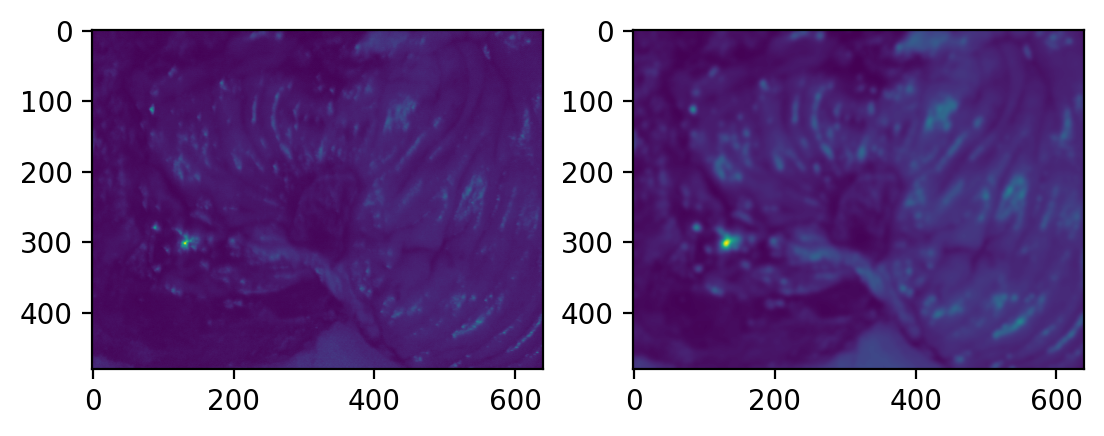

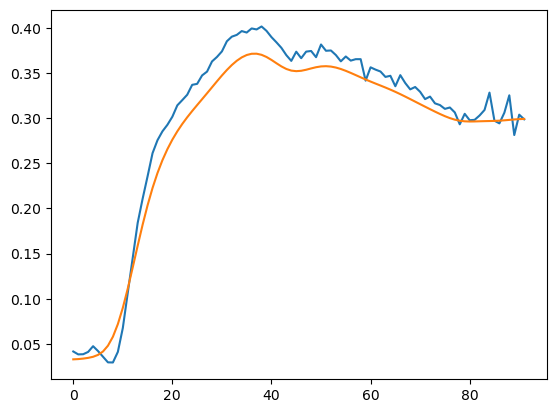

In [13]:
# check Gaussian filter sizes
# 0.5, 1, 1.5, 
# 0.1 doesn't do anything, 2+ - too smooth

for size in [0.1, 0.5, 1, 1.5, 2, 3]:
    print(f'Size {size}')
    spectrum_smoothed = gaussian_filter(spectrum, sigma=size)
    
    plot_difference(spectrum, spectrum_smoothed)